In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


In [18]:
# Load the data
#https://archive.ics.uci.edu/dataset/109/wine
raw_data = pd.read_csv('wine_labled.csv')

# Get rid of category label for clustering process
data = raw_data.iloc[:, 1:]


# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


C:\Users\W0485258\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\W0485258\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\W0485258\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

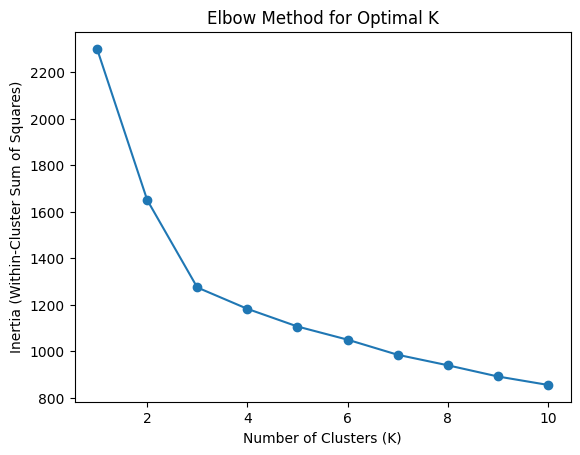

In [19]:

# Perform elbow test
inertia = []
for k in range(1, 11):  # You can adjust the range of clusters to test
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()

# Choose an optimal K based on the elbow in the plot
optimal_k = 3


In [20]:


# Perform K-means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Display associated data for each cluster
for cluster_num in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster_num].iloc[:, 1:]  # Exclude the cluster column
    print(f"\nCluster {cluster_num} - Size: {len(cluster_data)}")
    print(cluster_data.head())  # Display the first few rows for each cluster



Cluster 0 - Size: 65
    1.71  2.43  15.6  127   2.8  3.06   .28  2.29  5.64  1.04  3.92  1065  \
58  0.94  1.36  10.6   88  1.98  0.57  0.28  0.42  1.95  1.05  1.82   520   
59  1.10  2.28  16.0  101  2.05  1.09  0.63  0.41  3.27  1.25  1.67   680   
61  1.25  1.92  18.0   94  2.10  1.79  0.32  0.73  3.80  1.23  2.46   630   
62  1.13  2.16  19.0   87  3.50  3.10  0.19  1.87  4.45  1.22  2.87   420   
63  1.45  2.53  19.0  104  1.89  1.75  0.45  1.03  2.95  1.45  2.23   355   

    Cluster  
58        0  
59        0  
61        0  
62        0  
63        0  

Cluster 1 - Size: 51
     1.71  2.43  15.6  127   2.8  3.06   .28  2.29  5.64  1.04  3.92  1065  \
60   1.36  2.02  16.8  100  2.02  1.41  0.53  0.62  5.75  0.98  1.59   450   
82   3.86  2.32  22.5   85  1.65  1.59  0.61  1.62  4.80  0.84  2.01   515   
117  3.43  1.98  16.0   80  1.63  1.25  0.43  0.83  3.40  0.70  2.12   372   
129  1.35  2.32  18.0  122  1.51  1.25  0.21  0.94  4.10  0.76  1.29   630   
130  2.99  2.40  20

C:\Users\W0485258\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


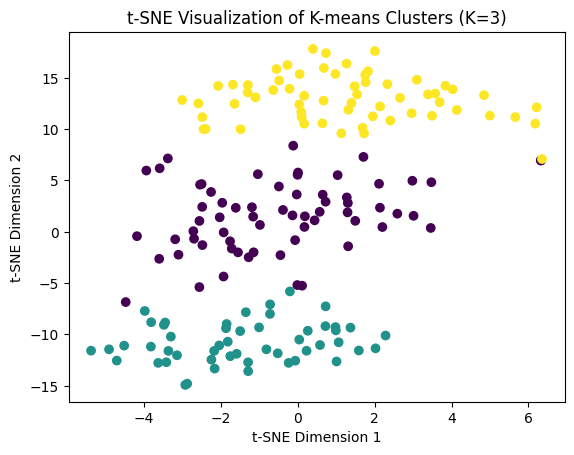

In [21]:


# Visualize using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(data_scaled)

# Plot the clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['Cluster'], cmap='viridis')
plt.title(f't-SNE Visualization of K-means Clusters (K={optimal_k})')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()



In [22]:

# now, let's use our actual category labels in the wine_labeled CSV to check
# how accurate our clustering was...

ari_score = adjusted_rand_score(raw_data.iloc[:, 0], data['Cluster'])
print(f"Adjusted Rand Index: {ari_score}")

nmi_score = normalized_mutual_info_score(raw_data.iloc[:, 0], data['Cluster'])
print(f"Normalized Mutual Information: {nmi_score}")


Adjusted Rand Index: 0.8967612479015284
Normalized Mutual Information: 0.8753250828936504
